In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [37]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['month']=df['Date_of_Journey'].dt.month
df['weekday']=df['Date_of_Journey'].dt.dayofweek
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,weekday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,6
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Converted departure and arrival time to datetime format

In [38]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['duration']=df['Arrival_Time']-df['Dep_Time']
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,weekday,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-08-19 22:20:00,2020-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,6,-151 days +02:50:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-08-19 05:50:00,2020-08-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,0 days 07:25:00
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-08-19 09:25:00,2020-06-10 04:25:00,19h,2 stops,No info,13882,9,4,-71 days +19:00:00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-08-19 18:05:00,2020-08-19 23:30:00,5h 25m,1 stop,No info,6218,12,3,0 days 05:25:00
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-08-19 16:50:00,2020-08-19 21:35:00,4h 45m,1 stop,No info,13302,1,3,0 days 04:45:00


In [39]:
df['duration']=pd.to_datetime(df['duration'])
df['duration_hr']=df['duration'].dt.hour
df['duration_min']=df['duration'].dt.minute
drop=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route']
df.drop(drop,inplace=True,axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,weekday,duration,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,6,1969-08-03 02:50:00,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,1970-01-01 07:25:00,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,4,1969-10-22 19:00:00,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,3,1970-01-01 05:25:00,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,1970-01-01 04:45:00,4,45


In [40]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [46]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [47]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'month', 'weekday', 'duration', 'duration_hr', 'duration_min'],
      dtype='object')

In [48]:
col=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'weekday', 'month', 'duration_min']
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()))

                                          Price
Airline                                        
Air Asia                            5590.260188
Air India                           9611.210616
GoAir                               5861.056701
IndiGo                              5673.682903
Jet Airways                        11643.923357
Jet Airways Business               58358.666667
Multiple carriers                  10902.678094
Multiple carriers Premium economy  11418.846154
SpiceJet                            4338.284841
Trujet                              4140.000000
Vistara                             7796.348643
Vistara Premium economy             8962.333333
                 Price
Source                
Banglore   8017.464269
Chennai    4789.892388
Delhi     10539.439057
Kolkata    9158.389411
Mumbai     5059.708752
                    Price
Destination              
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata    

# For easy understandability of the info above let us visualize it through graphs.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


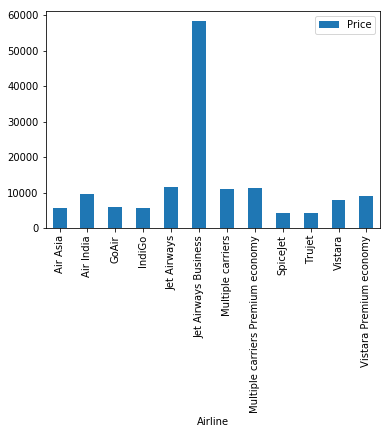

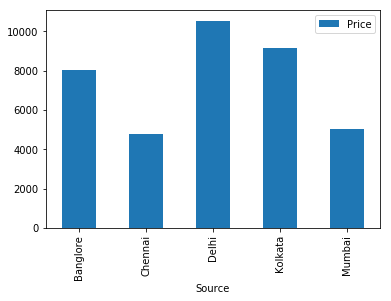

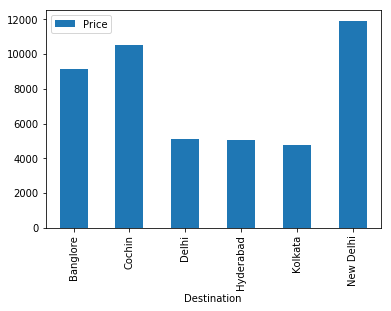

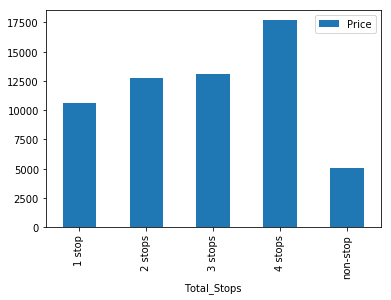

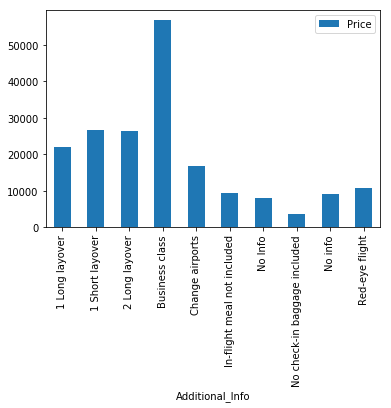

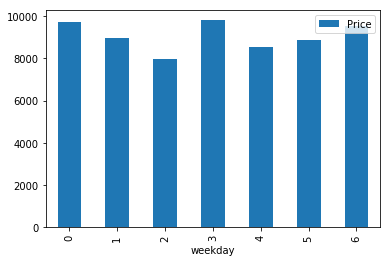

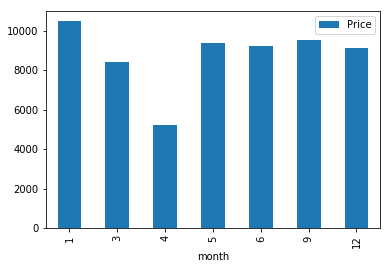

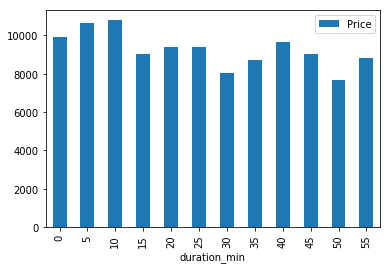

In [49]:
for m in col:
    print(pd.DataFrame(df.groupby(m)['Price'].mean()).plot.bar())

In [50]:
df['duration_min']=df['duration_min'].replace(0,np.nan)
df.replace('New Delhi','Delhi',inplace=True)

In [51]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,weekday,duration,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,non-stop,No info,3897,3,6,1969-08-03 02:50:00,2,50.0
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,1970-01-01 07:25:00,7,25.0
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,4,1969-10-22 19:00:00,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,3,1970-01-01 05:25:00,5,25.0
4,IndiGo,Banglore,Delhi,1 stop,No info,13302,1,3,1970-01-01 04:45:00,4,45.0


In [52]:
df['duration_min'].isnull().count()

10683

In [58]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [80]:
addi = ['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover']
for i in addi:
    print(pd.DataFrame(df[df['Additional_Info']==i].groupby('Additional_Info')['Airline'].nunique()))
       

                 Airline
Additional_Info         
No info               12
                             Airline
Additional_Info                     
In-flight meal not included        2
                              Airline
Additional_Info                      
No check-in baggage included        1
                 Airline
Additional_Info         
1 Short layover        1
                 Airline
Additional_Info         
No Info                1
                 Airline
Additional_Info         
1 Long layover         3
                 Airline
Additional_Info         
Change airports        1
                 Airline
Additional_Info         
Business class         2
                 Airline
Additional_Info         
Red-eye flight         1
                 Airline
Additional_Info         
2 Long layover         1


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


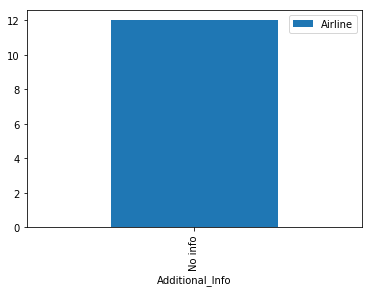

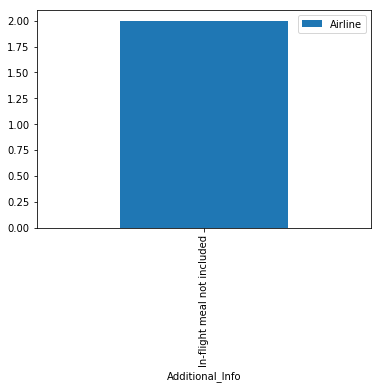

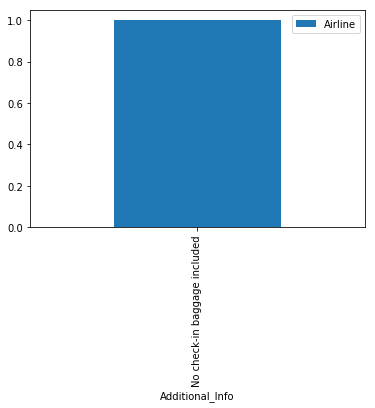

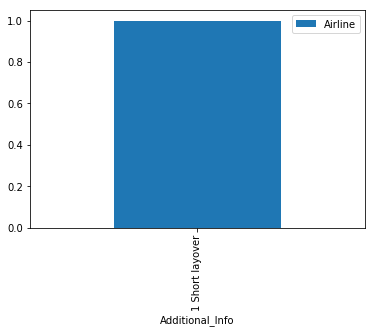

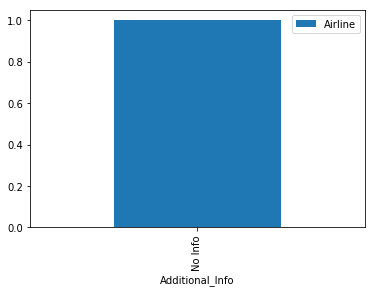

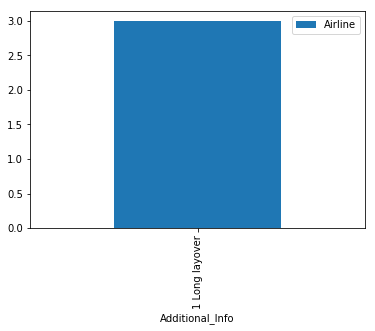

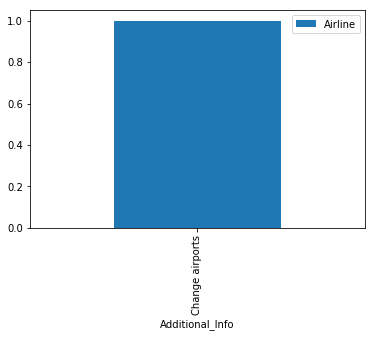

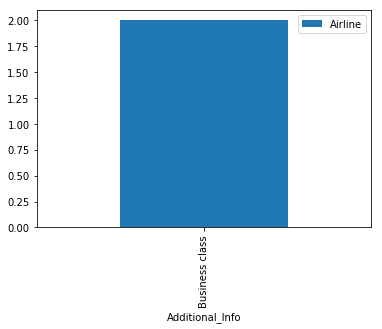

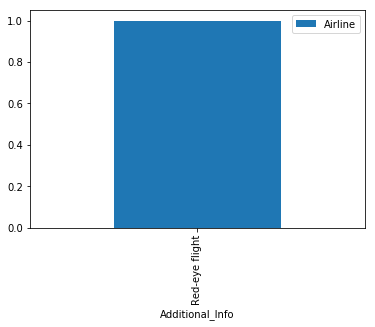

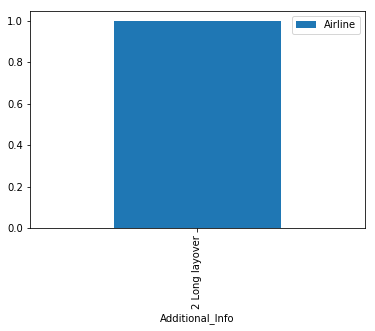

In [88]:
addi = ['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover']
for i in addi:
    print(pd.DataFrame(df[df['Additional_Info']==i].groupby('Additional_Info')['Airline'].nunique()).plot.bar())
       

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units